##**Bacharelado em Ciência de Dados - Univesp** 🏆
---
###**Disciplina - Modelagem e Inferência Estatística** 💻
###**Link**:https://ava.univesp.br/ultra/courses/_5842_1/cl/outline
##**Profa. Drª. Victoria Alejandra Salazar Herrera**💪
##**Aluno: Aelso Rocha Brito**👷
##**notebook**ComAnotaçõesDasVideoaulas✍
## **Semestre:** 01.2022
---



# Videoaula 10 Adequação de modelos e regressão não linear

## Exemplo 2: GT Auto

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')
plt.rc('axes', titlesize=10)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#Observar os dados
import io
#import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['carst.csv'].decode('utf-8')))
df.head(30)


,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


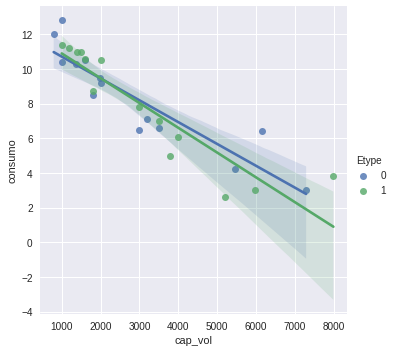

In [ ]:
sns.lmplot(x='cap_vol', y='consumo',hue='Etype', data=df);plt.grid(True)

In [ ]:
df1 = df[df.Etype != 1]
df1.head(15)

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [ ]:
df1 = pd.DataFrame(data=df1)
#definir a variável resposta
y = df1['consumo']
#definir a vriável preditora
x = df1['cap_vol']

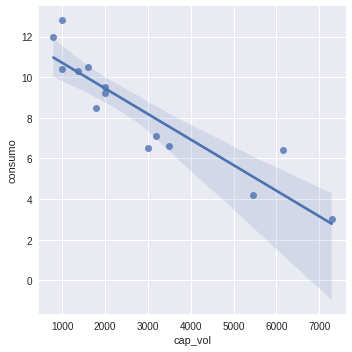

In [ ]:
#@title Gráficos de diagnóstico 1 (y vs. x)
sns.lmplot(x='cap_vol', y='consumo', data=df1);plt.grid(True)

In [ ]:
#adicionar uma constante preditora
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit() #atenção esta variável será usada no IC
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     60.33
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.08e-06
Time:                        07:05:42   Log-Likelihood:                -21.429
No. Observations:                  14   AIC:                             46.86
Df Residuals:                      12   BIC:                             48.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9686      0.566     21.145      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [ ]:
# parâmetros da reta
b=modelo.params
b0=b[0] #intercepto
b1=b[1] #inclinação
print('y= {0}{1} x'.format(b0,b1))

y= 11.968578736702083-0.00125931162205358 x


In [ ]:
x = df1['cap_vol']

In [ ]:
y_pred=list(modelo.predict())
#sns.resid(modelo)
resi=list(modelo.resid)

In [ ]:
#crear instancia influence
influence = modelo.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

In [ ]:
prop=np.divide(resi,stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

In [ ]:
#@title Tabela geral
dft = pd.DataFrame(list(zip(x, y, y_pred, resi, stdresid, prop)),
               columns =["x","y","yc","e","e*","e/e*"])
dft 

,x,y,yc,e,e*,e/e*
0,792,12.0,10.971204,1.028796,0.923383,1.114160
1,994,10.4,10.716823,-0.316823,-0.281988,1.123532
2,1000,12.8,10.709267,2.090733,1.860422,1.123795
3,1368,10.3,10.245840,0.054160,0.047584,1.138197
4,1598,10.5,9.956199,0.543801,0.474716,1.145529
5,1796,8.5,9.706855,-1.206855,-1.048677,1.150836
6,1997,9.5,9.453733,0.046267,0.040048,1.155287
7,1999,9.2,9.451215,-0.251215,-0.217440,1.155327
8,2996,6.5,8.195681,-1.695681,-1.457151,1.163696
9,3197,7.1,7.942559,-0.842559,-0.724684,1.162657


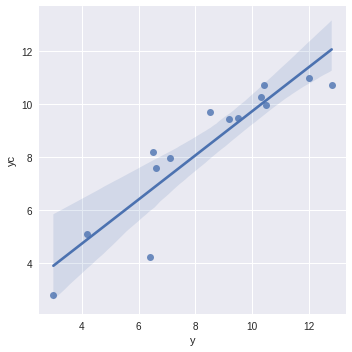

In [ ]:
#@title Gráficos de diagnóstico 2 (y vs. yc)
sns.lmplot(x='y', y='yc', data=dft);plt.grid(True)

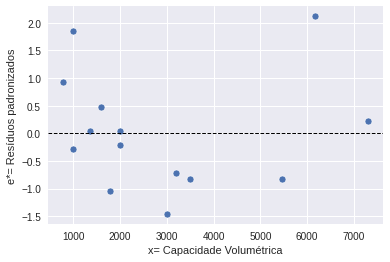

In [ ]:
#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='x', y='e*', data=dft);plt.grid(True)
plt.xlabel('x= Capacidade Volumétrica')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

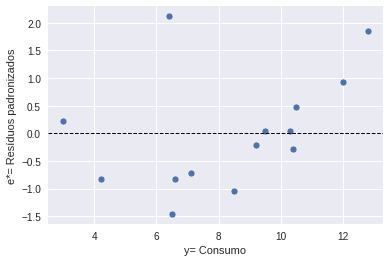

In [ ]:
#@title Gráficos de diagnóstico 4 (resíduos padronizados vs. y)
sns.scatterplot(x='y', y='e*', data=dft);plt.grid(True)
plt.xlabel('y= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

Text(0, 0.5, 'Resíduos padronizados')

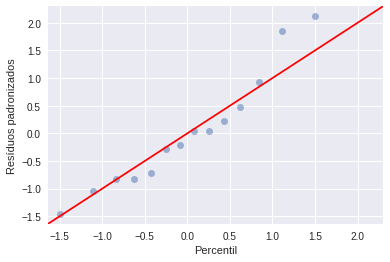

In [ ]:
#@title Gráficos de diagnóstico 5 Probabilidade Normal
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [ ]:
test = modelo.outlier_test()
print("test.columns:", test.columns)
print(test)
outliers = ((x[i],y[i]) for i,t in enumerate(test.iloc[:,2]) if t < 0.5)
print ('Outliers: ', list(outliers))

test.columns: Index(['student_resid', 'unadj_p', 'bonf(p)'], dtype='object')
    student_resid   unadj_p   bonf(p)
0        0.917259  0.378679  1.000000
1       -0.270882  0.791497  1.000000
2        2.111586  0.058416  0.817825
3        0.045562  0.964476  1.000000
4        0.458835  0.655286  1.000000
5       -1.053463  0.314720  1.000000
6        0.038345  0.970099  1.000000
7       -0.208595  0.838577  1.000000
8       -1.537782  0.152355  1.000000
9       -0.709532  0.492760  1.000000
10      -0.819602  0.429844  1.000000
11      -0.809540  0.435366  1.000000
12       2.564645  0.026300  0.368201
13       0.223034  0.827597  1.000000
Outliers:  [(6162, 6.4)]


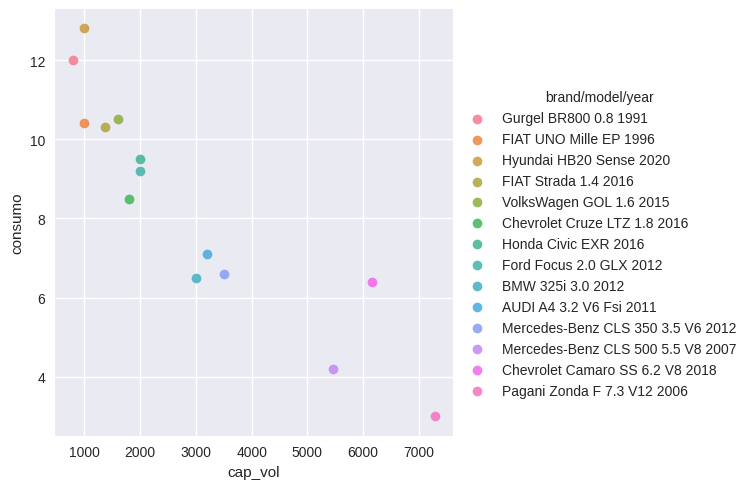

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='cap_vol', y='consumo',hue='brand/model/year', data=df1);

In [ ]:
a= modelo.conf_int(alpha=0.05, cols=None) #intervalo de confiança de b0 e b1
a

,0,1
const,10.735300,13.201858
cap_vol,-0.001613,-0.000906


In [ ]:
display(a.iloc[0,:]) #intervalo de confiança b0
display(a.iloc[1,:]) #intervalo de confiança b0

0    10.735300
1    13.201858
Name: const, dtype: float64

0   -0.001613
1   -0.000906
Name: cap_vol, dtype: float64

## Exemplo 3
Nenhum aficionado de fritas gosta que fiquem encharcadas, por isso é importante encontrar características do processo de produção que as produzam com uma textura atraente. 
Os seguintes dados em que x=tempo de fritura (s) e y= teor de umidade (%) apareceram no artigo “Thermal and Physical Properties of Tortilla Chips as a Function of Frying Time” (J. of Food Processing and Preservation, 1995: 175–189).


a.   Construa um gráfico de dispersão de y versus x e comente.

b.   Construa um gráfico de dispersão dos pares (ln(x), ln(y)) e comente.

c.   Qual é a relação probabilística entre x e y sugerido pelo padrão linear no gráfico da parte (b)?

d.   Preveja o valor do teor de umidade ao fritar as batatas por 20s, de uma forma que transmite informações sobre confiabilidade e precisão.

e.   Analise os resíduos do ajuste do modelo de regressão linear para os dados transformados e comente.


In [ ]:
lstx = (5, 10, 15, 20, 25, 30, 45, 60)
lsty= (16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3)
# Construir o DataFrame e nomear as colunas
dfries = pd.DataFrame(list(zip(lstx, lsty)),
               columns =["x","y"])
x=dfries['x']
y=dfries['y']
dfries.head()

,x,y
0,5,16.3
1,10,9.7
2,15,8.1
3,20,4.2
4,25,3.4


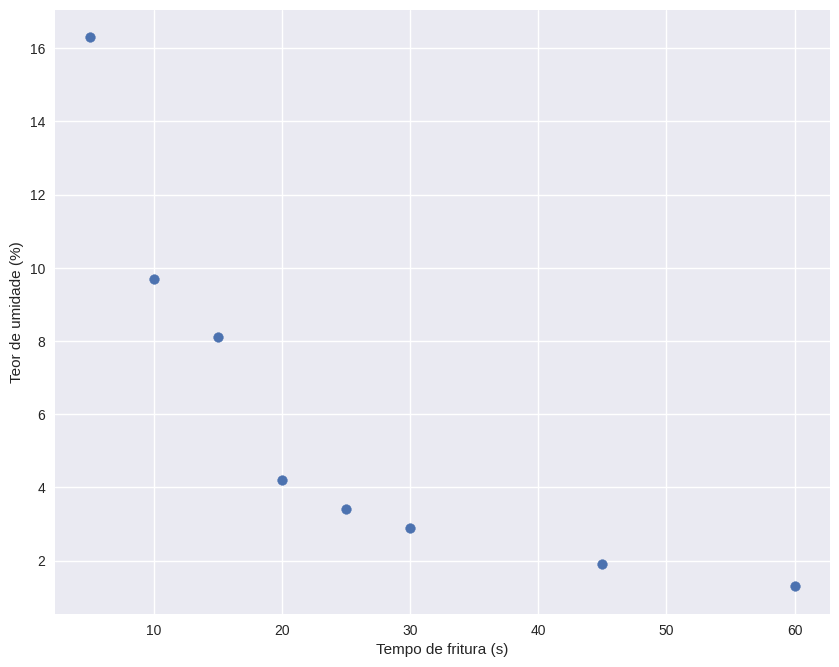

In [ ]:
#@title Resposta a)
# Gráfico de dispersão
#plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(dfries['x'],dfries['y'])
plt.xlabel('Tempo de fritura (s)');
plt.ylabel('Teor de umidade (%)')
plt.grid(True)
plt.show()

In [ ]:
#adicionar uma constante preditora
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit() #atenção esta variável será usada no IC
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     11.48
Date:                Mon, 28 Mar 2022   Prob (F-statistic):             0.0147
Time:                        07:05:47   Log-Likelihood:                -19.587
No. Observations:                   8   AIC:                             43.17
Df Residuals:                       6   BIC:                             43.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8599      2.079      5.705      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


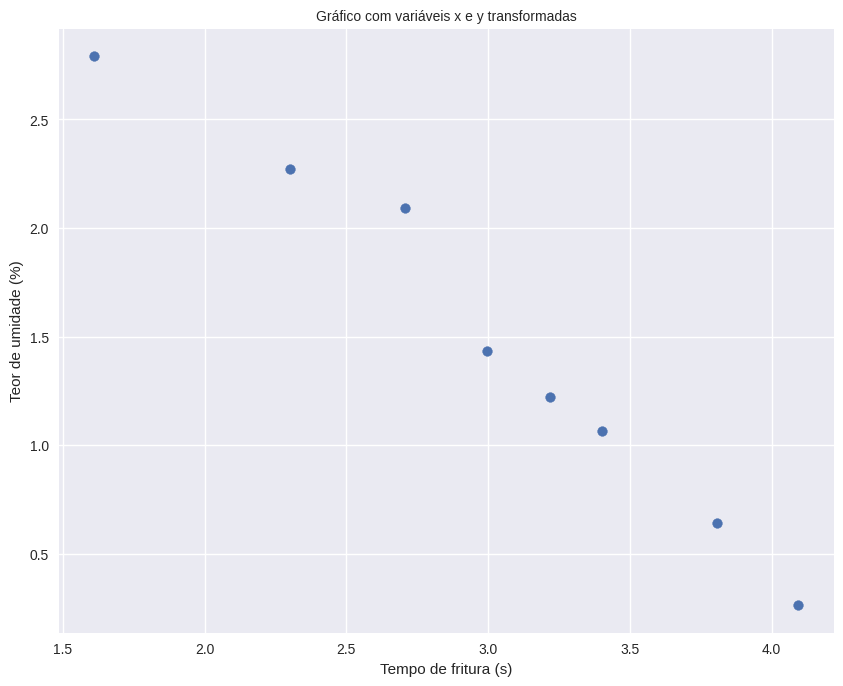

In [ ]:
#@title Resposta b)
x=dfries['x']
y=dfries['y']
vtx=np.log(x)
vty=np.log(y)
plt.scatter(vtx,vty)
plt.xlabel('Tempo de fritura (s)');
plt.ylabel('Teor de umidade (%)')
plt.title('Gráfico com variáveis x e y transformadas')
plt.grid(True)
plt.show()

In [ ]:
dfries2 = pd.DataFrame(list(zip(x, y, vtx, vty)),
               columns =["x","y","ln_x","ln_y"])
dfries2.head()

,x,y,ln_x,ln_y
0,5,16.3,1.609438,2.791165
1,10,9.7,2.302585,2.272126
2,15,8.1,2.708050,2.091864
3,20,4.2,2.995732,1.435085
4,25,3.4,3.218876,1.223775


In [ ]:
#@title Resposta c)
#adicionar uma constante preditora
vtx = sm.add_constant(vtx)
#fit linear regression model
modelo = sm.OLS(vty, vtx).fit() #atenção esta variável será usada no IC
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     239.1
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           4.63e-06
Time:                        07:05:48   Log-Likelihood:                 5.2525
No. Observations:                   8   AIC:                            -6.505
Df Residuals:                       6   BIC:                            -6.346
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6384      0.211     21.978      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
# parâmetros da reta
b=modelo.params
b0=b[0] #intercepto
b1=b[1] #inclinação
print('y= {0}{1} x'.format(b0,b1))

y= 4.638414883849997-1.049198121311452 x


In [ ]:
from numpy.core.fromnumeric import mean
#@title Resposta d)


In [ ]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # nível de significia = 5% 
df = len(x) - 2 # gl (n - 2)                                     
v = t.ppf(1 - alpha/2, df) 
print(f't=: {v}') 

t=: 2.4469118487916806


Uma fórmula alternativa de SQE é

$SQE=∑(y_i - \hat{y}_i)$

$s^2=\frac{SQE}{n-2}$

$s=\sqrt(s^2)$

e $s_{\hat{Y}}=s\sqrt(\frac{1}{n}+\frac{(x^* -\bar{x})^2}{S_{XX}})$


In [ ]:
x=dfries['x']
y=dfries['y']
vtx=np.log(x)
vty=np.log(y)
y_pred=list(modelo.predict())
#sns.resid(modelo)
resi=(modelo.resid)
#SQE = residuos ao quadrado
sqe=np.sum(resi*resi) 
gl=modelo.df_resid  #gl=n-2
s2=sqe/gl
s=pow(s2,1/2)
sqe,s2,s

(0.1259894484543931, 0.02099824140906552, 0.14490769961967348)

In [ ]:
vtxs=np.log(20) #x*=ln(20)
vtxm=vtx.mean()
n=modelo.df_resid + 2 #gl+2=n
xx=np.sum(vtx*vtx)
xau=np.sum(vtx)
sxx=xx-xau*xau/n
sy=s*pow(((1/n)+(vtxs-vtxm)*(vtxs-vtxm)/sxx),1/2)
sy


0.05125314354652712

In [ ]:
#valor esperado de y para x=ln(20)
yln20=b0+b1*vtxs
yln20

1.4952982104850645

In [ ]:
sya=pow((s2+sy*sy),1/2)
#IP do valor esperado para um valor específico de x 
IPyln20=([yln20-v*sya,yln20+v*sya])
import math
IPye200=pow(math.e,IPyln20[0])
IPye201=pow(math.e,IPyln20[1])
IPyln20,IPye200,IPye201

([1.119196427848415, 1.871399993121714], 3.0623923610729658, 6.497386331053654)

In [ ]:
#@title resposta e)
#x=dfries['x']
#y=dfries['y']
#vtx=np.log(x)
#vty=np.log(y)
#y_pred=list(modelo.predict())
##sns.resid(modelo)
resi=list(modelo.resid)
#crear instancia influence
influence = modelo.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
prop=np.divide(resi,stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado
dft2 = pd.DataFrame(list(zip(vtx, vty, y_pred, resi, stdresid, prop)),
               columns =["x","y","yc","e","e*","e/e*"])
dft2 

,x,y,yc,e,e*,e/e*
0,1.609438,2.791165,2.949796,-0.158631,-1.649456,0.096171
1,2.302585,2.272126,2.222547,0.049579,0.391681,0.126580
2,2.708050,2.091864,1.797134,0.294730,2.200852,0.133916
3,2.995732,1.435085,1.495298,-0.060214,-0.444247,0.135541
4,3.218876,1.223775,1.261176,-0.037401,-0.277341,0.134855
5,3.401197,1.064711,1.069885,-0.005174,-0.038898,0.133019
6,3.806662,0.641854,0.644472,-0.002618,-0.021025,0.124511
7,4.094345,0.262364,0.342636,-0.080272,-0.703222,0.114149


Text(0, 0.5, 'Resíduos padronizados')

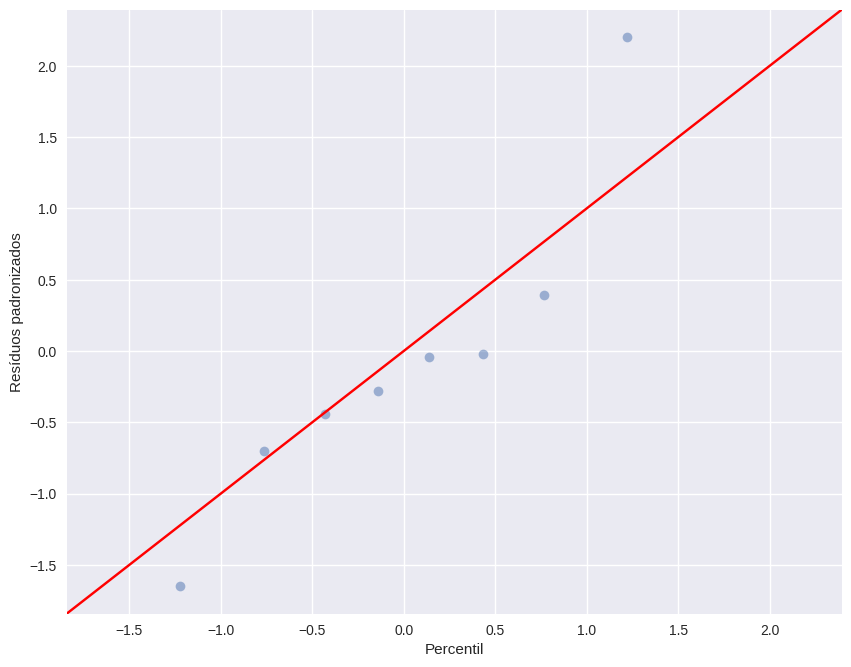

In [ ]:
#Gráficos de diagnóstico 5 Probabilidade Normal
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')